# Springboard - Data Science Career Track - Capstone 1

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy as pts
import statsmodels.api as sm
import random

# Import tools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from scipy.spatial.distance import cdist

# Import models
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

# Suppress warning
import warnings;
warnings.filterwarnings('ignore');

## Part 1: Data Wrangling

In [3]:
# Read in data from CSV
df = pd.read_csv('allCongressDataPublish.csv')
df = df.drop_duplicates()

# Inspect the data
df.head()

,stateDist,abroadPrcnt,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,prcntExAliens,totalHouseholds,under10k,over10k,over15k,...,numPassH,numEnact,passPrcnt,congNum,partyControl,demSeats,repSeats,otherSeats,ses,sesNorm
0,AK.0,NaN,54.541518,588358.0,1.327253,NaN,106181.0,14.029817,85.970183,78.523465,...,3.0,2.0,6.666667,93.0,D,243.0,192.0,0.0,0.147659,35.339666
1,AL.1,NaN,15.405078,543377.0,0.457325,NaN,148712.0,20.154392,79.845608,72.468261,...,0.0,0.0,0.000000,93.0,D,243.0,192.0,0.0,-1.075380,11.690437
2,AL.2,NaN,24.197693,530286.0,0.495582,NaN,165462.0,23.441636,76.558364,67.187632,...,2.0,1.0,3.030303,93.0,D,243.0,192.0,0.0,-1.097884,11.255282
3,AL.3,NaN,20.234837,555795.0,0.317203,NaN,162704.0,25.357090,74.642910,66.138509,...,1.0,0.0,0.000000,93.0,D,243.0,192.0,0.0,-1.264190,8.039513
4,AL.4,NaN,15.244589,493752.0,0.148253,NaN,159228.0,21.855453,78.144547,69.694400,...,1.0,1.0,5.882353,93.0,D,243.0,192.0,0.0,-1.435099,4.734744


In [4]:
# Delete unneeded columns
del df['abroadPrcnt']
del df['prcntExAliens']
del df['totalHouseholds']
del df['meanIncome']
del df['medianIncome']
del df['totalEmploymentPop']
del df['prcntNotEmploy']
del df['totalPopRaceFile']
del df['prcntBlackNotHisp']
del df['prcntMulti']
del df['prcntWhite']
del df['prcntNotHisp']
del df['prcntOld']
del df['medianAge']
del df['sponID']
del df['icpsr']
del df['state']
del df['district']
del df['lastName']
del df['firstName']
del df['middleName']
del df['age']
del df['gender']
del df['numberTerms']
del df['daysServed']
del df['fracServed']
del df['cd']
del df['statenm']
del df['dwnom1']
del df['dwnom2']
del df['comPower']
del df['chair']
del df['rank']
del df['comName']
del df['numCom']
del df['rankChair']
del df['black']
del df['hispanic']
del df['numSpon']
del df['numCosp']
del df['numPassH']
del df['numEnact']
del df['passPrcnt']
del df['partyControl']
del df['demSeats']
del df['repSeats']
del df['otherSeats']
del df['ses']
del df['sesNorm']

# Inspect the data
df.head()

,stateDist,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,under10k,over10k,over15k,over25k,over35k,over50k,...,prcntUnemp,prcntBA,prcntHS,prcntAsian,prcntBlack,prcntHisp,prcntWhiteAll,gini,party,congNum
0,AK.0,54.541518,588358.0,1.327253,14.029817,85.970183,78.523465,72.888747,63.228826,49.549354,...,4.485170,14.140283,66.658073,3.148423,1.514894,1.530580,40.675065,0.128563,Republican,93.0
1,AL.1,15.405078,543377.0,0.457325,20.154392,79.845608,72.468261,64.847490,51.344881,31.147453,...,2.692152,6.830163,40.297523,0.276788,29.581856,1.632954,60.562372,0.064529,Republican,93.0
2,AL.2,24.197693,530286.0,0.495582,23.441636,76.558364,67.187632,58.843118,44.934789,27.204434,...,1.877222,8.356176,43.119566,0.117107,27.597372,0.820256,64.945143,0.060138,Republican,93.0
3,AL.3,20.234837,555795.0,0.317203,25.357090,74.642910,66.138509,58.930942,44.303152,25.725858,...,2.038250,6.874170,36.865034,0.072509,27.756277,1.018866,60.953049,0.052972,Democrat,93.0
4,AL.4,15.244589,493752.0,0.148253,21.855453,78.144547,69.694400,61.685131,46.047178,25.332228,...,2.535659,4.100965,32.548181,0.028962,8.503662,1.062788,91.135226,0.047624,Democrat,93.0


In [5]:
# Remove rows with missing values
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# Remove 'Independent' rows contained in 'party' from the data 
df = df[df['party'] != 'Independent']

# Replace 'Republican-Conservative' rows with 'Republican' in the data
df = df.replace(to_replace='Republican-Conservative', value='Republican')

## Part 2: Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'gini')

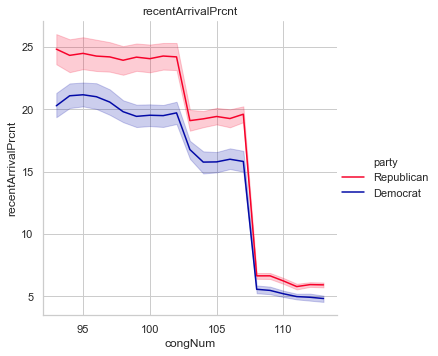

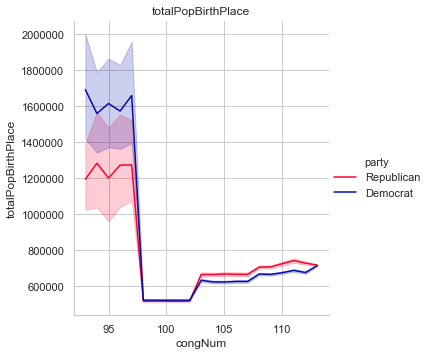

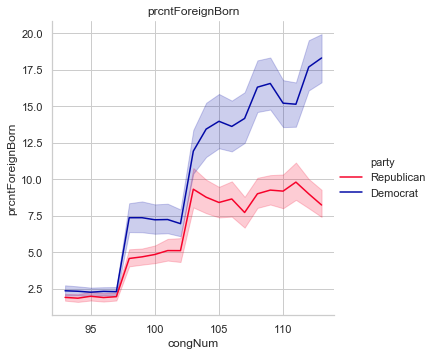

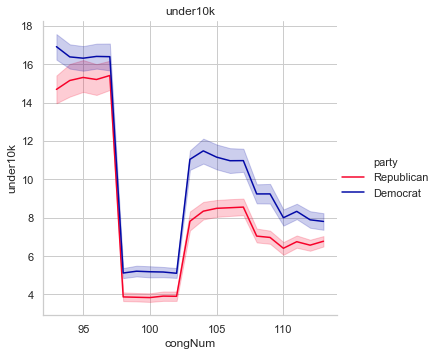

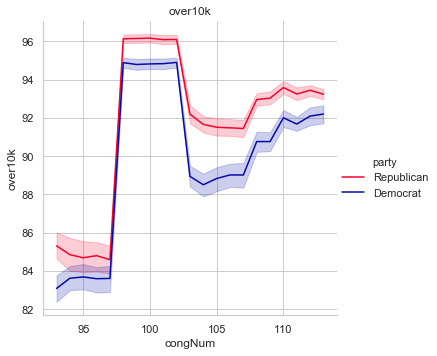

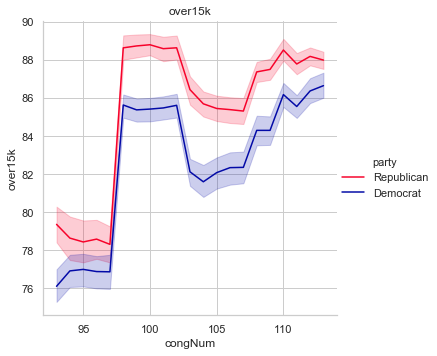

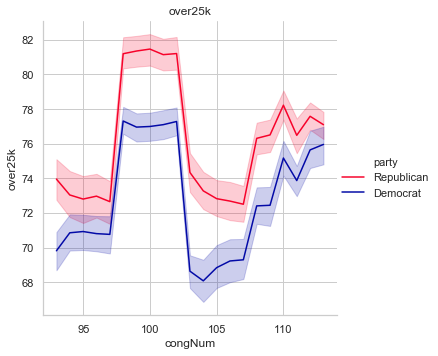

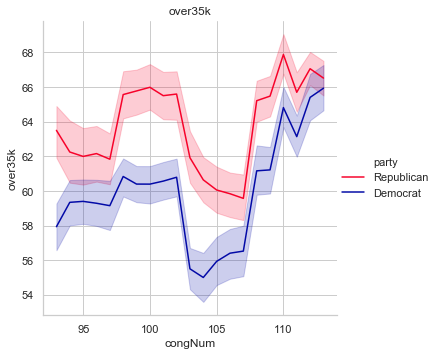

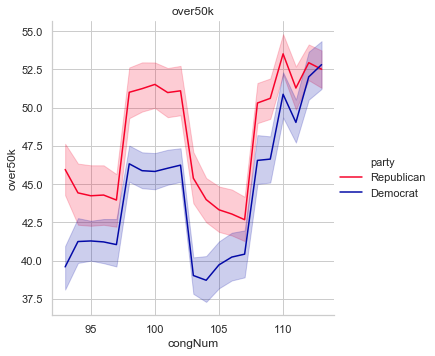

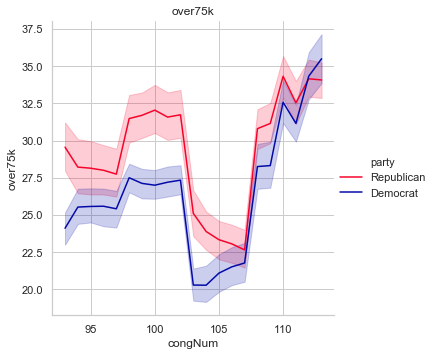

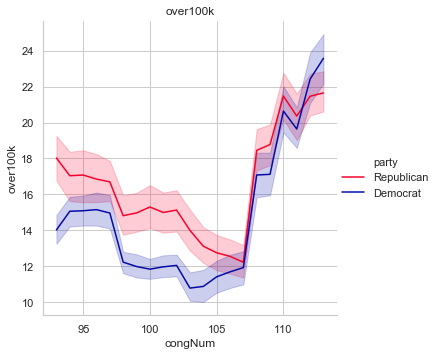

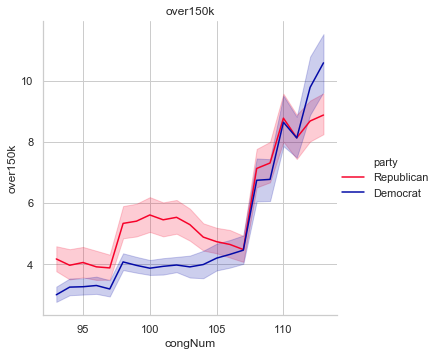

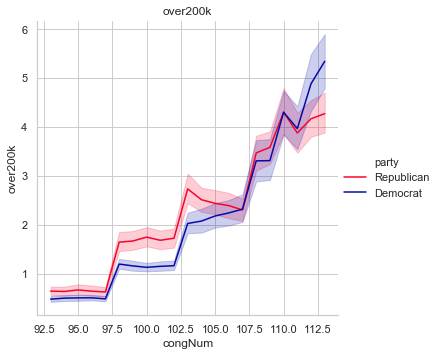

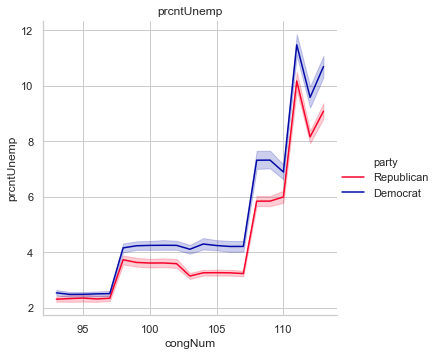

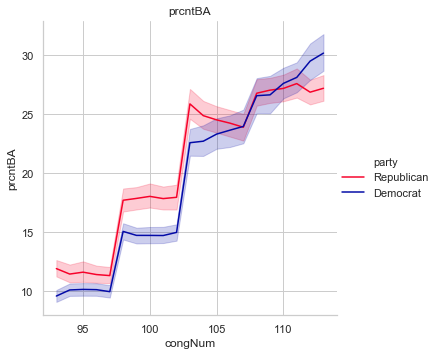

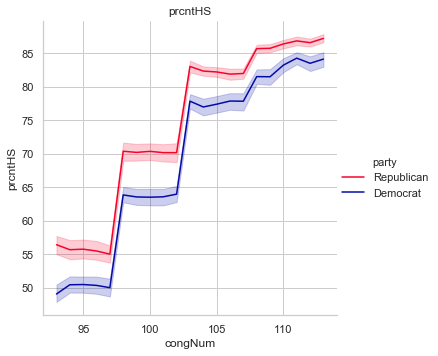

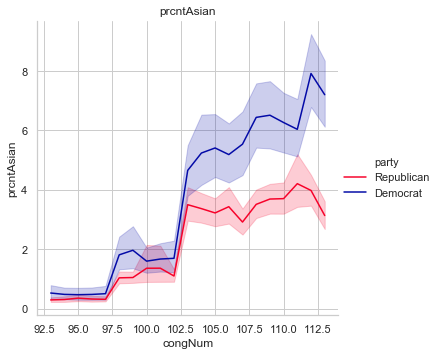

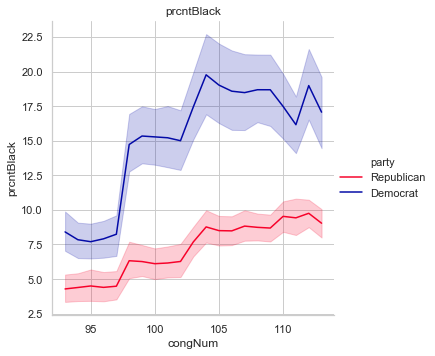

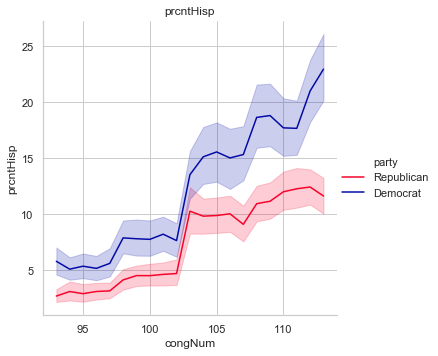

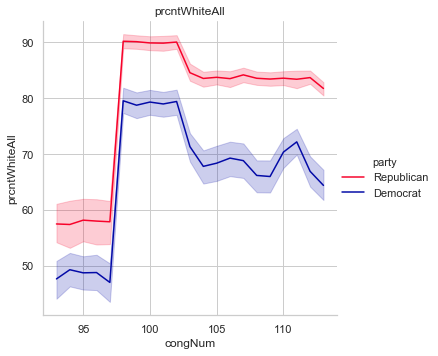

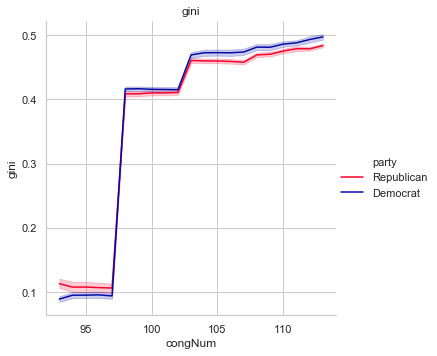

In [6]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')
colors = ['cherry red', 'cobalt blue']

# Perform graphical EDA on recentArrivalPrcnt
sns.relplot(x='congNum', y='recentArrivalPrcnt', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('recentArrivalPrcnt')

# Perform graphical EDA on totalPopBirthPlace
sns.relplot(x='congNum', y='totalPopBirthPlace', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('totalPopBirthPlace')

# Perform graphical EDA on prcntForeignBorn
sns.relplot(x='congNum', y='prcntForeignBorn', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('prcntForeignBorn')

# Perform graphical EDA on under10k
sns.relplot(x='congNum', y='under10k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('under10k')

# Perform graphical EDA on over10k
sns.relplot(x='congNum', y='over10k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('over10k')

# Perform graphical EDA on over15k
sns.relplot(x='congNum', y='over15k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('over15k')

# Perform graphical EDA on over25k
sns.relplot(x='congNum', y='over25k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('over25k')

# Perform graphical EDA on over35k
sns.relplot(x='congNum', y='over35k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('over35k')

# Perform graphical EDA on over50k
sns.relplot(x='congNum', y='over50k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('over50k')

# Perform graphical EDA on over75k
sns.relplot(x='congNum', y='over75k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('over75k')

# Perform graphical EDA on over100k
sns.relplot(x='congNum', y='over100k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('over100k')

# Perform graphical EDA on over150k
sns.relplot(x='congNum', y='over150k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('over150k')

# Perform graphical EDA on over200k
sns.relplot(x='congNum', y='over200k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('over200k')

# Perform graphical EDA on prcntUnemp
sns.relplot(x='congNum', y='prcntUnemp', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('prcntUnemp')

# Perform graphical EDA on prcntBA
sns.relplot(x='congNum', y='prcntBA', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('prcntBA')

# Perform graphical EDA on prcntHS
sns.relplot(x='congNum', y='prcntHS', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('prcntHS')

# Perform graphical EDA on prcntAsian
sns.relplot(x='congNum', y='prcntAsian', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('prcntAsian')

# Perform graphical EDA on prcntBlack
sns.relplot(x='congNum', y='prcntBlack', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('prcntBlack')

# Perform graphical EDA on prcntHisp
sns.relplot(x='congNum', y='prcntHisp', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('prcntHisp')

# Perform graphical EDA on prcntWhiteAll
sns.relplot(x='congNum', y='prcntWhiteAll', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('prcntWhiteAll')

# Perform graphical EDA on gini
sns.relplot(x='congNum', y='gini', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)
plt.title('gini')

#### Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

In general, it appears that there are large, national changes in certain variables that affect Democratic and Republican districts in the same way. For example, according to the graph plotting **recentArrivalPrcnt** there has been a distinct reduction in the mobility of Americans. 

The **recentArrivalPrcnt** variable tracks the percent of the district that recently moved into the district from another county or state. It definitely appears that between the 100th and 110th Congresses, there was a distinct reduction in the percentage of the district populations that recently moved from another county or state, suggesting that fewer people are moving and that people are more locked into their districts than they were historically.

In addition, it appears that the percent of the districts that was born in a foreign country has also increased in both Democratic and Republican districts - though this trends is significantly more pronounced in Democratic districts.

Additionally, unemployment rates have increased in both districts while High School and College graduation rates have increased in both as well.

Finally, it appears that inequality has increased (as measured by the gini coefficient - a smaller gini value signifying a more equal district) in both Democratic and Republican districts. 


#### Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

Of course, we are more interested in those things that differentiate Democratic and Republican districts. Though many of these national trends are represented in both types of district, we also see many of these trends are being more pronounced in one type of district versus another.

For example, though mobility has declined is has declined less in Republican districts; and though the percent of the district that was born in a foreign country has also increased in both Democratic and Republican districts, this trend is dramatically more pronounced in Democratic districts, and has actually declined in recent years amongst Republican districts.

There also appears to be a distinct gap between Republican and Democratic districts when it comes to the percent of households earning more than 35,000 dollars. There is a large and persistent inequality, with a greater percentage of Republican district households earning more than 35,000 dollars.

Though graduation rates have increased for both High School and College in both Democratic and Republican districts Republican districts have a consistently higher rate of High School gradutaion, while Democatic districts have only recently outpaced Republican districts in terms of College graduation - a reversal of a long established trend.

The greatest divergences appear when we compare Democratic and Republican districts by racial composition. Democratic districts have consistently higher concentrations of Asian, Black, and Hispanic Americans than their Republican counteraparts, and both Democratic and Republican districts are becoming less white overall. 

In sum, the trends point toward a more static, highly educated, and diverse nation - but with these trends being far more pronounced in Democratic districts than in Republican ones. Therefore, it is my contention that as we look to predict a district's party affiliation we will see that more static, highly educated, and diverse districts will vote Democratics, while more mobile, less educated, and more homogenous districts will vote Republican.

## Part 3: Our Model

In [7]:
# Convert non-numerical data using one-hot encoding
df = pd.get_dummies(df, columns=['party'])

# Delete the 'party_Republican' column
del df['party_Republican']

# Seperate out the Democrat and Republican data for statistical comparison
Democrat_df = df[df['party_Democrat'] == 1]
Democrat_df = Democrat_df[['recentArrivalPrcnt', 'totalPopBirthPlace', 'prcntForeignBorn', 'under10k', 'over10k', 'over15k', 'over25k', 'over35k', 'over50k', 'over75k', 'over100k', 'over150k', 'over200k', 'prcntUnemp', 'prcntBA', 'prcntHS', 'prcntAsian', 'prcntBlack', 'prcntHisp', 'prcntWhiteAll', 'gini']]

Republican_df = df[df['party_Democrat'] == 0]
Republican_df = Republican_df[['recentArrivalPrcnt', 'totalPopBirthPlace', 'prcntForeignBorn', 'under10k', 'over10k', 'over15k', 'over25k', 'over35k', 'over50k', 'over75k', 'over100k', 'over150k', 'over200k', 'prcntUnemp', 'prcntBA', 'prcntHS', 'prcntAsian', 'prcntBlack', 'prcntHisp', 'prcntWhiteAll', 'gini']]

# Calculate summary statistics on the two data sets
print(Democrat_df.describe().transpose())
print(Republican_df.describe().transpose())

                     count           mean           std            min  \
recentArrivalPrcnt  5124.0      15.429270  9.041663e+00       0.700000   
totalPopBirthPlace  5124.0  876942.576893  1.184444e+06  392934.000000   
prcntForeignBorn    5124.0       9.613794  1.126144e+01       0.138861   
under10k            5124.0      10.298618  5.936332e+00       1.665103   
over10k             5124.0      89.697928  5.938921e+00      67.818984   
over15k             5124.0      82.460148  7.066203e+00      58.243076   
over25k             5124.0      72.867819  8.702131e+00      43.200000   
over35k             5124.0      59.953064  1.045999e+01      29.205036   
over50k             5124.0      44.230729  1.179155e+01      17.212318   
over75k             5124.0      26.505244  1.057057e+01       6.900000   
over100k            5124.0      14.709576  8.276949e+00       2.179128   
over150k            5124.0       4.955634  4.375586e+00       0.481448   
over200k            5124.0       1.975

In [8]:
# Create variables X and y arrays from the dataset
features_df = df.drop(columns=['stateDist', 'congNum', 'party_Democrat'])

X = features_df
y = df['party_Democrat']

# Run a logit model on the data to determine significance (p < 0.05)
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                          Results: Logit
Model:                Logit              Pseudo R-squared:   inf   
Dependent Variable:   party_Democrat     AIC:                inf   
Date:                 2019-03-11 10:06   BIC:                inf   
No. Observations:     9298               Log-Likelihood:     -inf  
Df Model:             20                 LL-Null:            0.0000
Df Residuals:         9277               LLR p-value:        1.0000
Converged:            1.0000             Scale:              1.0000
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
recentArrivalPrcnt -0.0370   0.0041  -8.9709 0.0000 -0.0450 -0.0289
totalPopBirthPlace -0.0000   0.0000  -2.2300 0

In [9]:
# Remove insignificant variables from the model
X = features_df.drop(columns=['over75k', 'over150k', 'over200k', 'prcntUnemp'])

# Run a second logit model on the data to determine new p-values
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                          Results: Logit
Model:                Logit              Pseudo R-squared:   inf   
Dependent Variable:   party_Democrat     AIC:                inf   
Date:                 2019-03-11 10:06   BIC:                inf   
No. Observations:     9298               Log-Likelihood:     -inf  
Df Model:             16                 LL-Null:            0.0000
Df Residuals:         9281               LLR p-value:        1.0000
Converged:            1.0000             Scale:              1.0000
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
recentArrivalPrcnt -0.0389   0.0037 -10.6502 0.0000 -0.0461 -0.0317
totalPopBirthPlace -0.0000   0.0000  -2.7713 0

In [10]:
# Determine correlation amongst the remaining significant variables
print(X.corr())

                    recentArrivalPrcnt  totalPopBirthPlace  prcntForeignBorn  \
recentArrivalPrcnt            1.000000            0.123293         -0.377222   
totalPopBirthPlace            0.123293            1.000000         -0.128723   
prcntForeignBorn             -0.377222           -0.128723          1.000000   
under10k                      0.125286            0.221588         -0.207529   
over10k                      -0.125004           -0.221434          0.206980   
over15k                      -0.149867           -0.183050          0.238152   
over25k                       0.021177           -0.085048          0.130591   
over35k                      -0.070379           -0.047278          0.176151   
over50k                      -0.120455           -0.080565          0.236725   
over100k                     -0.175759            0.016933          0.316566   
prcntBA                      -0.282593           -0.145474          0.443792   
prcntHS                      -0.317288  

In [11]:
# Remove highly correlated features
X = features_df.drop(columns=['under10k'])

In [12]:
# Split data into test/train set (70/30 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Set an instance of LogisticRegressionCV using the liblinear solver and L1 penalty
liblinear_L1 = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', class_weight='balanced', multi_class='auto')

# Fit the model to the training data
liblinear_L1.fit(X_train, y_train)

# Predict y values using the model
y_pred = liblinear_L1.predict(X_test)

# Perform 5 fold Cross-validation to determine the Cross-validation score for 'liblinear (L1)'
scores = cross_val_score(liblinear_L1, X, y, cv=5)
print("Cross-validation Score ('liblinear (L1)'): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# Set an instance of LogisticRegressionCV using the liblinear solver and L2 penalty
liblinear_L2 = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear', class_weight='balanced', multi_class='auto')

# Fit the model to the training data
liblinear_L2.fit(X_train, y_train)

# Predict y values using the model
y_pred = liblinear_L2.predict(X_test)

# Perform 5 fold Cross-validation to determine the Cross-validation score for 'liblinear (L2)'
scores = cross_val_score(liblinear_L2, X, y, cv=5)
print("Cross-validation Score ('liblinear (L2)'): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# Set an instance of LogisticRegressionCV using the lbfgs solver
lbfgs = LogisticRegressionCV(cv=5, penalty='l2', solver='lbfgs', class_weight='balanced', multi_class='auto')

# Fit the model to the training data
lbfgs.fit(X_train, y_train)

# Predict y values using the model
y_pred = lbfgs.predict(X_test)

# Perform 5 fold Cross-validation to determine the Cross-validation score for 'lbfgs'
scores = cross_val_score(lbfgs, X, y, cv=5)
print("Cross-validation Score ('lbfgs'): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# Set an instance of LogisticRegressionCV using the newton-cg solver
newton_cg = LogisticRegressionCV(cv=5, penalty='l2', solver='newton-cg', class_weight='balanced', multi_class='auto')

# Fit the model to the training data
newton_cg.fit(X_train, y_train)

# Predict y values using the model
y_pred = newton_cg.predict(X_test)

# Perform 5 fold Cross-validation to determine the Cross-validation score for 'newton-cg'
scores = cross_val_score(newton_cg, X, y, cv=5)
print("Cross-validation Score ('newton-cg'): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# Set an instance of LogisticRegressionCV using the sag solver
sag = LogisticRegressionCV(cv=5, penalty='l2', solver='sag', class_weight='balanced', multi_class='auto')

# Fit the model to the training data
sag.fit(X_train, y_train)

# Predict y values using the model
y_pred = sag.predict(X_test)

# Perform 5 fold Cross-validation to determine the Cross-validation score for 'sag'
scores = cross_val_score(sag, X, y, cv=5)
print("Cross-validation Score ('sag'): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# Set an instance of LogisticRegressionCV using the saga solver and L1 penalty
saga_L1 = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', class_weight='balanced', multi_class='auto')

# Fit the model to the training data
saga_L1.fit(X_train, y_train)

# Predict y values using the model
y_pred = saga_L1.predict(X_test)

# Perform 5 fold Cross-validation to determine the Cross-validation score for 'saga (L1)'
scores = cross_val_score(saga_L1, X, y, cv=5)
print("Cross-validation Score ('saga (L1)'): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# Set an instance of LogisticRegressionCV using the saga solver and L2 penalty
saga_L2 = LogisticRegressionCV(cv=5, penalty='l2', solver='saga', class_weight='balanced', multi_class='auto')

# Fit the model to the training data
saga_L2.fit(X_train, y_train)

# Predict y values using the model
y_pred = saga_L2.predict(X_test)

# Perform 5 fold Cross-validation to determine the Cross-validation score for 'saga (L2)'
scores = cross_val_score(saga_L2, X, y, cv=5)
print("Cross-validation Score ('saga (L2)'): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validation Score ('liblinear (L1)'): 0.61 (+/- 0.08)
Cross-validation Score ('liblinear (L2)'): 0.63 (+/- 0.07)
Cross-validation Score ('lbfgs'): 0.57 (+/- 0.08)
Cross-validation Score ('newton-cg'): 0.61 (+/- 0.11)
Cross-validation Score ('sag'): 0.55 (+/- 0.00)
Cross-validation Score ('saga (L1)'): 0.55 (+/- 0.00)
Cross-validation Score ('saga (L2)'): 0.55 (+/- 0.00)


## Part 4: Analyzing the Results

### Using K-Means to Categorize District Probabilities

In [13]:
# Determine estimated probabilities from the previously fitted logistic regression
X_proba = liblinear_L2.predict_proba(X)

# Determine the Democratic specific probabilities from the previously fitted logistic regression
Democratic_proba = liblinear_L2.predict_proba(X)[:,1]

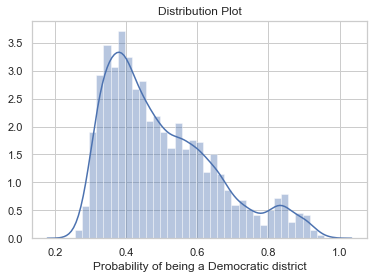

In [14]:
# Plot the estimated probabilities of the districts
sns.distplot(Democratic_proba)
plt.xlabel('Probability of being a Democratic district')
plt.title('Distribution Plot')
plt.show()

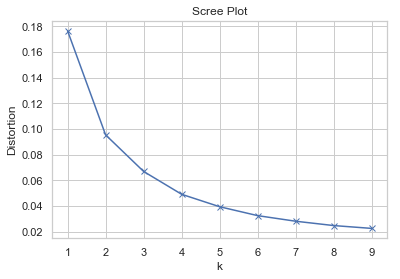

In [15]:
# Determine k using a Scree Plot
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_proba)
    kmeanModel.fit(X_proba)
    distortions.append(sum(np.min(cdist(X_proba, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_proba.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Scree Plot')
plt.show()

In [16]:
# Create an instance of the K-Means model
kmeans = KMeans(n_clusters=3)

# Fit the model
kmeans.fit(X_proba)

# Predict y: y_kmeans
y_kmeans = kmeans.predict(X_proba)

In [17]:
# Bring in stateDist and congNum
stateDist = df['stateDist']
congNum = df['congNum']

# Zip together stateDist, y_prob, and y_kmeans using a list comprehension: zipped
zipped = [list(t) for t in zip(stateDist, congNum, Democratic_proba, y_kmeans)]

# Convert the zipped list into a DataFrame: df_clustered
df_clustered = pd.DataFrame(zipped, columns=['stateDist', 'congNum', 'Democratic_proba', 'cluster'])

# Print the resulting DataFrame
print(df_clustered.head())

  stateDist  congNum  Democratic_proba  cluster
0      AK.0     93.0          0.480543        1
1      AL.1     93.0          0.678324        1
2      AL.2     93.0          0.615400        1
3      AL.3     93.0          0.651051        1
4      AL.4     93.0          0.469691        0


### Analyzing District Probabilities Over Time

Text(0.5, 1.0, "Alabama's First Congressional District")

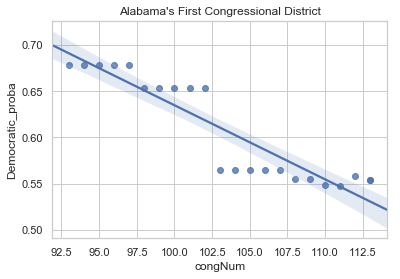

In [18]:
# Select AL.1 specific data
df_clustered_AL_1 = df_clustered[df_clustered['stateDist'] == 'AL.1']

# Plot y_prob trend
sns.regplot(x='congNum', y='Democratic_proba', data=df_clustered_AL_1)
plt.title("Alabama's First Congressional District")

Text(0.5, 1.0, "Alabama's Seventh Congressional District")

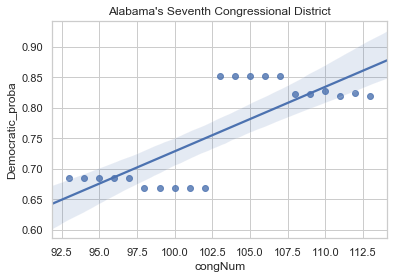

In [19]:
# Select AL.7 specific data
df_clustered_AL_7 = df_clustered[df_clustered['stateDist'] == 'AL.7']

# Plot y_prob trend
sns.regplot(x='congNum', y='Democratic_proba', data=df_clustered_AL_7)
plt.title("Alabama's Seventh Congressional District")

### Analyzing the Clusters

In [20]:
# Seperate out cluster 0 specific data and describe it
cluster_0 = df_clustered[df_clustered['cluster'] == 0]
print('Cluster 0 - Summary Statistics')
print(cluster_0.describe())

# Seperate out cluster 1 specific data and describe it
cluster_1 = df_clustered[df_clustered['cluster'] == 1]
print('Cluster 1 - Summary Statistics')
print(cluster_1.describe())

# Seperate out cluster 2 specific data and describe it
cluster_2 = df_clustered[df_clustered['cluster'] == 2]
print('Cluster 2 - Summary Statistics')
print(cluster_2.describe())

Cluster 0 - Summary Statistics
           congNum  Democratic_proba  cluster
count  4916.000000       4916.000000   4916.0
mean    103.799430          0.382584      0.0
std       5.698927          0.049405      0.0
min      93.000000          0.256615      0.0
25%      99.000000          0.343210      0.0
50%     104.000000          0.383195      0.0
75%     109.000000          0.421588      0.0
max     113.000000          0.475246      0.0
Cluster 1 - Summary Statistics
           congNum  Democratic_proba  cluster
count  3181.000000       3181.000000   3181.0
mean    101.568689          0.568155      1.0
std       6.323567          0.058399      0.0
min      93.000000          0.475453      1.0
25%      96.000000          0.516571      1.0
50%     101.000000          0.562090      1.0
75%     107.000000          0.613913      1.0
max     113.000000          0.681644      1.0
Cluster 2 - Summary Statistics
           congNum  Democratic_proba  cluster
count  1201.000000       1201.000

In [21]:
# Stop the execution of the program to verify cluster designations
assert False, "breakpoint"

AssertionError: breakpoint

In [22]:
Republican_113 = cluster_0[cluster_0['congNum'] == 113]
Republican_113 = Republican_113.drop_duplicates()
print('Number of Republican Districts: ' + str(len(Republican_113)))

swing_113 = cluster_1[cluster_1['congNum'] == 113]
swing_113 = swing_113.drop_duplicates()
print('Number of Swing Districts: ' + str(len(swing_113)))

Democratic_113 = cluster_2[cluster_2['congNum'] == 113]
Democratic_113 = Democratic_113.drop_duplicates()
print('Number of Democratic Districts: ' + str(len(Democratic_113)))

print('Total Districts: ' + str(len(Democratic_113) + len(swing_113) + len(Republican_113)))

Number of Republican Districts: 243
Number of Swing Districts: 130
Number of Democratic Districts: 63
Total Districts: 436


In [23]:
# Print the swing districts from the 113th Congress
swing_districts_113 = swing_113['stateDist'].unique()
print(swing_districts_113)

['AL.1' 'AL.2' 'AL.3' 'AR.2' 'AR.4' 'AZ.3' 'CA.10' 'CA.11' 'CA.12' 'CA.13'
 'CA.14' 'CA.15' 'CA.17' 'CA.20' 'CA.22' 'CA.23' 'CA.24' 'CA.25' 'CA.26'
 'CA.28' 'CA.3' 'CA.30' 'CA.31' 'CA.36' 'CA.39' 'CA.42' 'CA.47' 'CA.5'
 'CA.53' 'CA.6' 'CA.7' 'CA.8' 'CA.9' 'CT.1' 'DE.0' 'FL.10' 'FL.14' 'FL.15'
 'FL.17' 'FL.2' 'FL.21' 'FL.22' 'FL.23' 'FL.25' 'FL.26' 'FL.27' 'FL.9'
 'GA.1' 'GA.10' 'GA.12' 'GA.3' 'GA.7' 'GA.8' 'HI.1' 'HI.2' 'IL.11' 'IL.3'
 'IL.8' 'IN.1' 'IN.7' 'KY.3' 'LA.3' 'LA.4' 'LA.5' 'LA.6' 'MA.7' 'MD.2'
 'MD.3' 'MD.5' 'MD.6' 'MN.5' 'MO.5' 'MS.1' 'MS.3' 'MS.4' 'NC.2' 'NC.3'
 'NC.4' 'NC.7' 'NC.8' 'NJ.1' 'NJ.12' 'NJ.2' 'NJ.6' 'NJ.9' 'NM.1' 'NM.2'
 'NM.3' 'NV.3' 'NV.4' 'NY.11' 'NY.17' 'NY.26' 'NY.4' 'OH.3' 'OK.5' 'PA.13'
 'PA.14' 'SC.2' 'SC.3' 'SC.4' 'SC.5' 'SC.7' 'TN.5' 'TX.1' 'TX.10' 'TX.14'
 'TX.15' 'TX.16' 'TX.17' 'TX.2' 'TX.20' 'TX.22' 'TX.23' 'TX.24' 'TX.27'
 'TX.28' 'TX.32' 'TX.34' 'TX.35' 'TX.5' 'TX.6' 'TX.7' 'VA.11' 'VA.2'
 'VA.4' 'VA.5' 'VA.8' 'WA.4' 'WA.9']


### Analyzing Swing District Trends

In [24]:
# Create empty arrays to accept the for-loop's values
Democratic_Trending_Swing_Districts = []
Republican_Trending_Swing_Districts = []

# Create a for-loop that looks at all of the swing districts in the 113th congress and assigns them as either
# Democratic trending or Republican trending
for district in swing_districts_113:
    data = df_clustered[df_clustered['stateDist'] == district]
    data = data.drop_duplicates()
    
    X = data['congNum']
    X = np.array(X)
    
    y = data['Democratic_proba']
    y = np.array(y)
    
    slope, intercept = np.polyfit(X, y, 1)
    
    if slope > 0:
        Democratic_Trending_Swing_Districts.append(district)
    else:
        Republican_Trending_Swing_Districts.append(district)

# Print the total number of Democratic and Republican trending swing districts 
print('Number of Democratic Trending Swing Districts: ' + str(len(Democratic_Trending_Swing_Districts)))
print('Number of Republican Trending Swing Districts: ' + str(len(Republican_Trending_Swing_Districts)))

# Print the total number of Democratic and Republican districts (solid + swing)
print('Total Democratic Districts: ' + str(len(Democratic_113) + len(Democratic_Trending_Swing_Districts)))
print('Total Republican Districts: ' + str(len(Republican_113) + len(Republican_Trending_Swing_Districts)))

Number of Democratic Trending Swing Districts: 40
Number of Republican Trending Swing Districts: 90
Total Democratic Districts: 103
Total Republican Districts: 333


### Analyzing National Trends

Text(0.5, 1.0, 'National recentArrivalPrcnt Trend (4th Order Polynomial)')

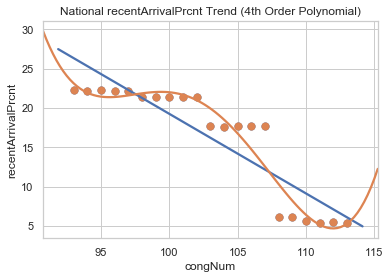

In [177]:
# Visualize feature trends

# recentArrivalPrcnt (Simple Straight-Line)
sns.regplot(x='congNum', y='recentArrivalPrcnt', data=df, x_estimator=np.mean, ci=None, order=1)

# recentArrivalPrcnt (4th Order Polynomial)
sns.regplot(x='congNum', y='recentArrivalPrcnt', data=df, x_estimator=np.mean, ci=None, order=4)
plt.title("National recentArrivalPrcnt Trend (4th Order Polynomial)")

Text(0.5, 1.0, 'National totalPopBirthPlace Trend (3rd Order Polynomial)')

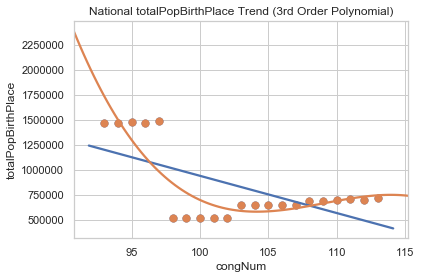

In [179]:
# totalPopBirthPlace (Simple Straight-Line)
sns.regplot(x='congNum', y='totalPopBirthPlace', data=df, x_estimator=np.mean, ci=None, order=1)

# totalPopBirthPlace (3rd Order Polynomial)
sns.regplot(x='congNum', y='totalPopBirthPlace', data=df, x_estimator=np.mean, ci=None, order=3)
plt.title("National totalPopBirthPlace Trend (3rd Order Polynomial)")

Text(0.5, 1.0, 'National prcntForeignBorn Trend')

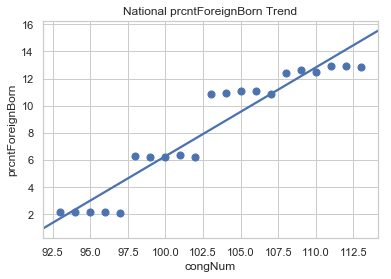

In [61]:
# prcntForeignBorn
sns.regplot(x='congNum', y='prcntForeignBorn', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National prcntForeignBorn Trend")

Text(0.5, 1.0, 'National over10k Trend')

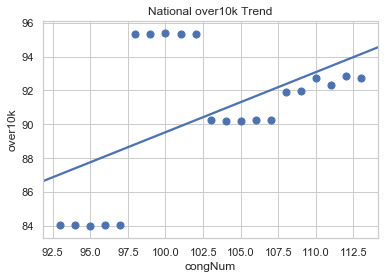

In [62]:
# over10k
sns.regplot(x='congNum', y='over10k', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National over10k Trend")

Text(0.5, 1.0, 'National over15k Trend')

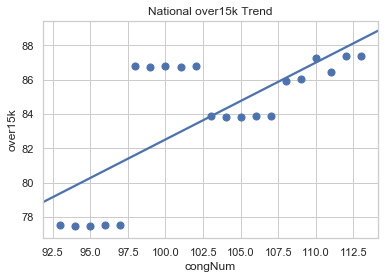

In [63]:
# over15k
sns.regplot(x='congNum', y='over15k', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National over15k Trend")

Text(0.5, 1.0, 'National over25k Trend')

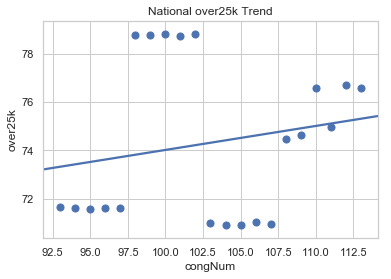

In [64]:
# over25k
sns.regplot(x='congNum', y='over25k', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National over25k Trend")

Text(0.5, 1.0, 'National over35k Trend')

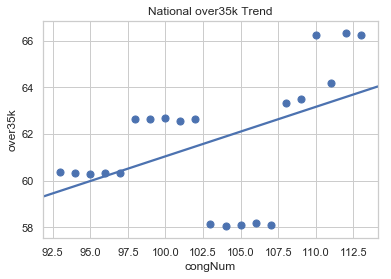

In [67]:
# over35k
sns.regplot(x='congNum', y='over35k', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National over35k Trend")

Text(0.5, 1.0, 'National over50k Trend')

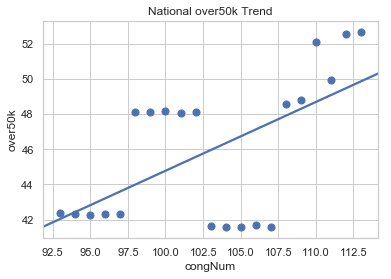

In [68]:
# over50k
sns.regplot(x='congNum', y='over50k', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National over50k Trend")

Text(0.5, 1.0, 'National over75k Trend')

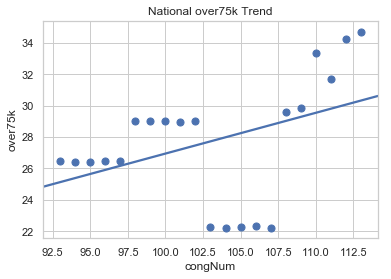

In [69]:
# over75k
sns.regplot(x='congNum', y='over75k', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National over75k Trend")

Text(0.5, 1.0, 'National over100k Trend')

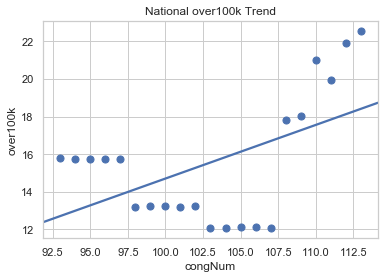

In [71]:
# over100k
sns.regplot(x='congNum', y='over100k', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National over100k Trend")

Text(0.5, 1.0, 'National over150k Trend')

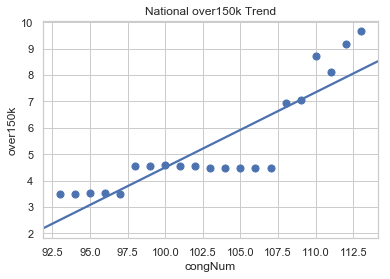

In [73]:
# over150k
sns.regplot(x='congNum', y='over150k', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National over150k Trend")

Text(0.5, 1.0, 'National over200k Trend')

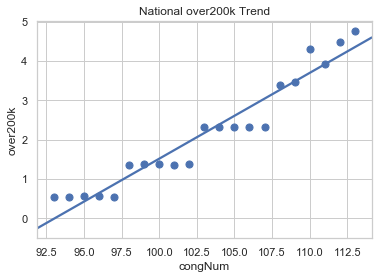

In [74]:
# over200k
sns.regplot(x='congNum', y='over200k', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National over200k Trend")

Text(0.5, 1.0, 'National prcntUnemp Trend')

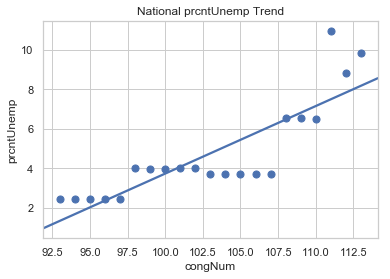

In [75]:
# prcntUnemp
sns.regplot(x='congNum', y='prcntUnemp', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National prcntUnemp Trend")

Text(0.5, 1.0, 'National prcntBA Trend')

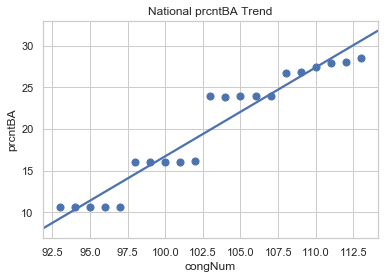

In [76]:
# prcntBA
sns.regplot(x='congNum', y='prcntBA', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National prcntBA Trend")

Text(0.5, 1.0, 'National prcntHS Trend (2nd Order Polynomial)')

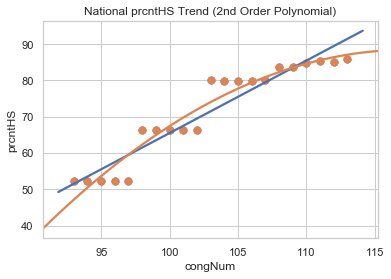

In [180]:
# prcntHS (Simply Straight-Line)
sns.regplot(x='congNum', y='prcntHS', data=df, x_estimator=np.mean, ci=None, order=1)

# prcntHS (2nd Order Polynomial)
sns.regplot(x='congNum', y='prcntHS', data=df, x_estimator=np.mean, ci=None, order=2)
plt.title("National prcntHS Trend (2nd Order Polynomial)")

Text(0.5, 1.0, 'National prcntAsian Trend')

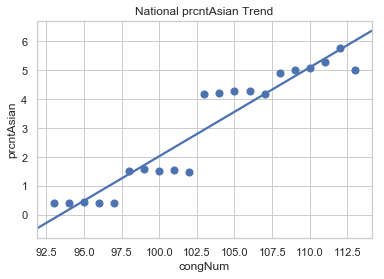

In [78]:
# prcntAsian
sns.regplot(x='congNum', y='prcntAsian', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National prcntAsian Trend")

Text(0.5, 1.0, 'National prcntBlack Trend (2nd Order Polynomial)')

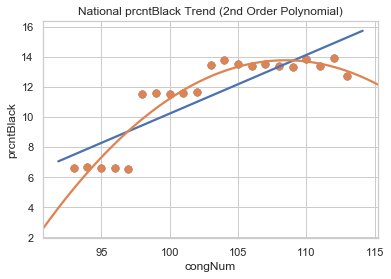

In [181]:
# prcntBlack (Simple Straight-Line)
sns.regplot(x='congNum', y='prcntBlack', data=df, x_estimator=np.mean, ci=None, order=1)

# prcntBlack (2nd Order Polynomial)
sns.regplot(x='congNum', y='prcntBlack', data=df, x_estimator=np.mean, ci=None, order=2)
plt.title("National prcntBlack Trend (2nd Order Polynomial)")

Text(0.5, 1.0, 'National prcntHisp Trend')

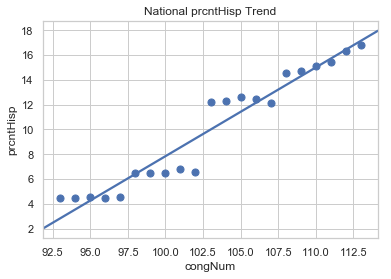

In [82]:
# prcntHisp
sns.regplot(x='congNum', y='prcntHisp', data=df, x_estimator=np.mean, ci=None, order=1)
plt.title("National prcntHisp Trend")

Text(0.5, 1.0, 'National prcntWhiteAll Trend (2nd Order Polynomial)')

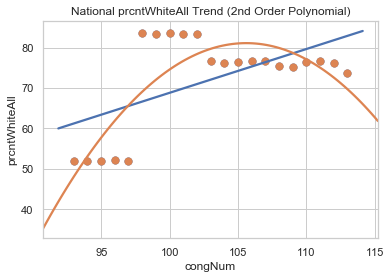

In [182]:
# prcntWhiteAll (Simple Straight-Line)
sns.regplot(x='congNum', y='prcntWhiteAll', data=df, x_estimator=np.mean, ci=None, order=1)

# prcntWhiteAll (2nd Order Polynomial)
sns.regplot(x='congNum', y='prcntWhiteAll', data=df, x_estimator=np.mean, ci=None, order=2)
plt.title("National prcntWhiteAll Trend (2nd Order Polynomial)")

Text(0.5, 1.0, 'National gini Trend (3rd Order Polynomial)')

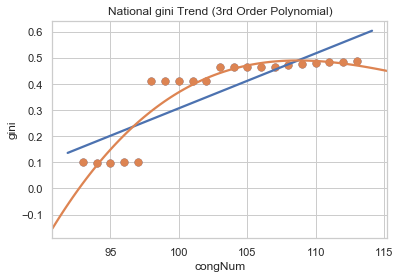

In [187]:
# gini (Simple Straight-Line)
sns.regplot(x='congNum', y='gini', data=df, x_estimator=np.mean, ci=None, order=1)

# gini (2nd Order Polynomial)
sns.regplot(x='congNum', y='gini', data=df, x_estimator=np.mean, ci=None, order=3)
plt.title("National gini Trend (3rd Order Polynomial)")

In [194]:
# Establish lead time
lead = 20

# Set X values
X = df['congNum']
X = np.array(X)
X_pred = 113 + lead

# Calculate predicted feature values
y = df['recentArrivalPrcnt']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
recentArrivalPrcnt_pred = (slope * X_pred) + intercept
print('recentArrivalPrcent Prediction: ' + str(recentArrivalPrcnt_pred))

y = df['totalPopBirthPlace']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
totalPopBirthPlace_pred = (slope * X_pred) + intercept
print('totalPopBirthPlace Prediction: ' + str(totalPopBirthPlace_pred))

y = df['prcntForeignBorn']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
prcntForeignBorn_pred = (slope * X_pred) + intercept
print('prcntForeignBorn Prediction: ' + str(prcntForeignBorn_pred))

y = df['over10k']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
over10k_pred = (slope * X_pred) + intercept
print('over10k Prediction: ' + str(over10k_pred))

y = df['over15k']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
over15k_pred = (slope * X_pred) + intercept
print('over15k Prediction: ' + str(over15k_pred))

y = df['over25k']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
over25k_pred = (slope * X_pred) + intercept
print('over25k Prediction: ' + str(over25k_pred))

y = df['over35k']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
over35k_pred = (slope * X_pred) + intercept
print('over35k Prediction: ' + str(over35k_pred))

y = df['over50k']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
over50k_pred = (slope * X_pred) + intercept
print('over50k Prediction: ' + str(over50k_pred))

y = df['over75k']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
over75k_pred = (slope * X_pred) + intercept
print('over75k Prediction: ' + str(over75k_pred))

y = df['over100k']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
over100k_pred = (slope * X_pred) + intercept
print('over100k Prediction: ' + str(over100k_pred))

y = df['over150k']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
over150k_pred = (slope * X_pred) + intercept
print('over150k Prediction: ' + str(over150k_pred))

y = df['over200k']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
over200k_pred = (slope * X_pred) + intercept
print('over200k Prediction: ' + str(over200k_pred))

y = df['prcntUnemp']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
prcntUnemp_pred = (slope * X_pred) + intercept
print('prcntUnemp Prediction: ' + str(prcntUnemp_pred))

y = df['prcntBA']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
prcntBA_pred = (slope * X_pred) + intercept
print('prcntBA Prediction: ' + str(prcntBA_pred))

y = df['prcntHS']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
prcntHS_pred = (slope * X_pred) + intercept
print('prcntHS Prediction: ' + str(prcntHS_pred))

y = df['prcntAsian']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
prcntAsian_pred = (slope * X_pred) + intercept
print('prcntAsian Prediction: ' + str(prcntAsian_pred))

y = df['prcntBlack']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
prcntBlack_pred = (slope * X_pred) + intercept
print('prcntBlack Prediction: ' + str(prcntBlack_pred))

y = df['prcntHisp']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
prcntHisp_pred = (slope * X_pred) + intercept
print('prcntHisp Prediction: ' + str(prcntHisp_pred))

y = df['prcntWhiteAll']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
prcntWhiteAll_pred = (slope * X_pred) + intercept
print('prcntWhiteAll Prediction: ' + str(prcntWhiteAll_pred))

y = df['gini']
y = np.array(y)
slope, intercept = np.polyfit(X, y, 1)
gini_pred = (slope * X_pred) + intercept
print('gini Prediction: ' + str(gini_pred))

recentArrivalPrcent Prediction: -14.128822992030848
totalPopBirthPlace Prediction: -287459.2857467439
prcntForeignBorn Prediction: 27.84545765128543
over10k Prediction: 101.24291165652423
over15k Prediction: 97.31036437953539
over25k Prediction: 77.2894044061598
over35k Prediction: 68.04084036483735
over50k Prediction: 57.682832408272404
over75k Prediction: 35.521499340001455
over100k Prediction: 24.11561319422909
over150k Prediction: 13.886689731450023
over200k Prediction: 8.709563684663806
prcntUnemp Prediction: 14.98898432958389
prcntBA Prediction: 51.97197545141866
prcntHS Prediction: 131.313543010039
prcntAsian Prediction: 12.159081500922014
prcntBlack Prediction: 23.07793644248605
prcntHisp Prediction: 31.478057385807617
prcntWhiteAll Prediction: 104.60599904387068
gini Prediction: 1.0020931315077772


In [195]:
# Create empty array to accept predicted feature values
predicted_feature_values = []

# Print the updated/corrected feature predictions
recentArrivalPrcnt_pred = 5.0
predicted_feature_values.append(recentArrivalPrcnt_pred)
print('recentArrivalPrcent Prediction: ' + str(recentArrivalPrcnt_pred))

totalPopBirthPlace_pred = 750000
predicted_feature_values.append(totalPopBirthPlace_pred)
print('totalPopBirthPlace Prediction: ' + str(totalPopBirthPlace_pred))

predicted_feature_values.append(prcntForeignBorn_pred)
print('prcntForeignBorn Prediction: ' + str(prcntForeignBorn_pred))

predicted_feature_values.append(over10k_pred)
print('over10k Prediction: ' + str(over10k_pred))

predicted_feature_values.append(over15k_pred)
print('over15k Prediction: ' + str(over15k_pred))

predicted_feature_values.append(over25k_pred)
print('over25k Prediction: ' + str(over25k_pred))

predicted_feature_values.append(over35k_pred)
print('over35k Prediction: ' + str(over35k_pred))

predicted_feature_values.append(over50k_pred)
print('over50k Prediction: ' + str(over50k_pred))

predicted_feature_values.append(over75k_pred)
print('over75k Prediction: ' + str(over75k_pred))

predicted_feature_values.append(over100k_pred)
print('over100k Prediction: ' + str(over100k_pred))

predicted_feature_values.append(over150k_pred)
print('over150k Prediction: ' + str(over150k_pred))

predicted_feature_values.append(over200k_pred)
print('over200k Prediction: ' + str(over200k_pred))

predicted_feature_values.append(prcntUnemp_pred)
print('prcntUnemp Prediction: ' + str(prcntUnemp_pred))

predicted_feature_values.append(prcntBA_pred)
print('prcntBA Prediction: ' + str(prcntBA_pred))

prcntHS_pred = 90.0
predicted_feature_values.append(prcntHS_pred)
print('prcntHS Prediction: ' + str(prcntHS_pred))

predicted_feature_values.append(prcntAsian_pred)
print('prcntAsian Prediction: ' + str(prcntAsian_pred))

prcntBlack_pred = 12.0
predicted_feature_values.append(prcntBlack_pred)
print('prcntBlack Prediction: ' + str(prcntBlack_pred))

predicted_feature_values.append(prcntHisp_pred)
print('prcntHisp Prediction: ' + str(prcntHisp_pred))

prcntWhiteAll_pred = 100.0 - (prcntAsian_pred + prcntBlack_pred + prcntHisp_pred)
predicted_feature_values.append(prcntWhiteAll_pred)
print('prcntWhiteAll  Prediction: ' + str(prcntWhiteAll_pred))

gini_pred = 0.5
predicted_feature_values.append(gini_pred)
print('gini Prediction: ' + str(gini_pred))

recentArrivalPrcent Prediction: 5.0
totalPopBirthPlace Prediction: 750000
prcntForeignBorn Prediction: 27.84545765128543
over10k Prediction: 101.24291165652423
over15k Prediction: 97.31036437953539
over25k Prediction: 77.2894044061598
over35k Prediction: 68.04084036483735
over50k Prediction: 57.682832408272404
over75k Prediction: 35.521499340001455
over100k Prediction: 24.11561319422909
over150k Prediction: 13.886689731450023
over200k Prediction: 8.709563684663806
prcntUnemp Prediction: 14.98898432958389
prcntBA Prediction: 51.97197545141866
prcntHS Prediction: 90.0
prcntAsian Prediction: 12.159081500922014
prcntBlack Prediction: 12.0
prcntHisp Prediction: 31.478057385807617
prcntWhiteAll  Prediction: 44.36286111327037
gini Prediction: 0.5


In [196]:
# Convert predicted_feature_values to a DataFrame
prediction_df = pd.DataFrame([predicted_feature_values], columns = ['recentArrivalPrcnt',
                                                                    'totalPopBirthPlace', 
                                                                    'prcntForeignBorn', 
                                                                    'over10k', 
                                                                    'over15k', 
                                                                    'over25k', 
                                                                    'over35k', 
                                                                    'over50k',
                                                                    'over75k', 
                                                                    'over100k', 
                                                                    'over150k',
                                                                    'over200k',
                                                                    'percentUnemp',
                                                                    'prcntBA', 
                                                                    'prcntHS', 
                                                                    'prcntAsian', 
                                                                    'prcntBlack', 
                                                                    'prcntHisp', 
                                                                    'prcntWhiteAll', 
                                                                    'gini'])

In [197]:
# Determine district party prediction
prediction = liblinear_L2.predict(prediction_df)

if prediction == 0:
    print('Prediction: Republican')
else:
    print('Prediction: Democratic')

# Determine district party prediction probabilities
prediction_proba = liblinear_L2.predict_proba(prediction_df)
print('Probability Republican: ' + str(prediction_proba[:,0][0]))
print('Probability Democratic: ' + str(prediction_proba[:,1][0]))

# Determine cluster prediction
cluster_prediction = kmeans.predict(prediction_proba)
print('Cluster Prediction: ' + str(cluster_prediction[0]))

Prediction: Democratic
Probability Republican: 0.31643051433774216
Probability Democratic: 0.6835694856622578
Cluster Prediction: 2
